In [1]:
#Extract the principal components step-by-step

#The first four step
#1. Standardizing the data
#2. Constructing the covariance matrix
#3. Obtaining the eigenvalues and eigenvectors of the covariance matrix
#4. Sorting the eigenvalues by decreasing order to rank the eigenvectors

import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
#splitting the data into 70% training and 30% test subsets

from sklearn.model_selection import train_test_split

X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values

#iloc is for index, loc is for the exact name of the column

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                    stratify=y,
                                                    random_state=0)

In [3]:
#Standardizing the data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test) 
#remember to re-use the mean and std from the training samples
#instead of standardizing the testing data


In [4]:
#Eigendecomposition of the covariance matrix

import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eigh(cov_mat) #always return real eigenvalues
#np.linalg.eig(cov_mat) is also okay but it is suboptimal because it may return complex eigenvalues in certain cases
print('\nEigenvalues\n%s' %eigen_vals)


Eigenvalues
[0.10754642 0.15362835 0.1808613  0.21357215 0.3131368  0.34650377
 0.51828472 0.6620634  0.84166161 0.96120438 1.54845825 2.41602459
 4.84274532]


In [5]:
#Total and explained variance
#One thing should keep in mind PCA is an unsupervised method, unlike random forest

tot = sum(eigen_vals) 
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [6]:
import matplotlib.pyplot as plt

plt.bar(range(1,14),var_exp,alpha=0.5,align='center',
        label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

<Figure size 640x480 with 1 Axes>

In [7]:
#
"""
Feature transformation

1. Select k eigenvectors, which correspond to the k largest eigenvalues,
   where k is the dimensionality of the new feature subspace (k<=d)
2. Construct a projection matrix W from the "top" k eigenvectors
3. Transform the d-dimensional input dataset X using the projection matrix W
   to obtain the new k-dimensional feature subspace
"""
#Make a list of (eigenvalue, eigenvetor) tuples

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i])
               for i in range(len(eigen_vecs))]

#Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k :k[0], reverse=True)
# sort according to the first element, which is the eigen value

#Notice the data structure of the 'eigen_pairs'
eigen_pairs

[(4.842745315655899,
  array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
         -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
         -0.32613263, -0.36861022, -0.29669651])),
 (2.4160245870352206,
  array([ 0.50303478,  0.16487119,  0.24456476, -0.11352904,  0.28974518,
          0.05080104, -0.02287338,  0.09048885,  0.00835233,  0.54977581,
         -0.20716433, -0.24902536,  0.38022942])),
 (1.5484582488203527,
  array([ 0.13774873, -0.09615039, -0.67777567, -0.62504055, -0.19613548,
         -0.14031057, -0.11705386, -0.13121778, -0.0304309 ,  0.07992997,
         -0.05305915, -0.13239103,  0.07065022])),
 (0.9612043774977358,
  array([-0.0032961 ,  0.56264669, -0.10897711,  0.0338187 , -0.36751107,
          0.24024513,  0.1870533 , -0.02292622,  0.49626233,  0.10648294,
         -0.36905375,  0.14201609, -0.16768217])),
 (0.8416616104578419,
  array([-0.29062523,  0.08953787, -0.16083499,  0.05158734,  0.67648707,
         -0.11851114,

In [8]:
#for illustration, we only choose two eigenvectors
#in practice, the number of principal components has to be determined by a trade-off between computational efficiency and the performance of the classifier

#notice the function of 'np.newaxis', it transforms the array-like eigenvectors into a column vector
w = np.hstack((eigen_pairs[0][1][:,np.newaxis],
               eigen_pairs[1][1][:,np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [9]:
#Using the projection matrix, we can now transform a sample x on to the PCA subspace
#obtaining x', now a two-dimensional sample vector consisting of two new features

#Similarly we can transform the entire training dataset onto the two principal components by calculating the matrix dot product"

X_train_pca = X_train_std.dot(w)

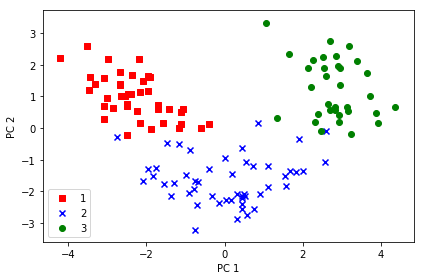

In [10]:
#visualize the transformed Wine training dataset

colors = ['r','b','g']
markers = ['s','x','o']

for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_pca[y_train==l,0],
                X_train_pca[y_train==l,1],
                c = c, label = l, marker = m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()

plt.show()

In [11]:
#Principal component analysis in scikit-learn

from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

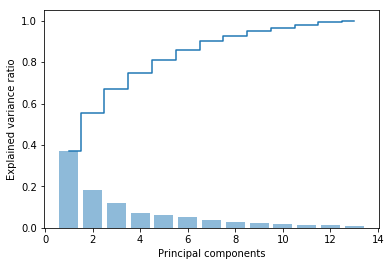

In [12]:
plt.bar(range(1,14),pca.explained_variance_ratio_,alpha=0.5,align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

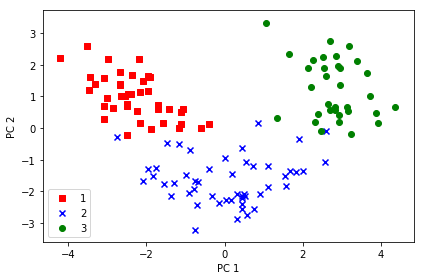

In [13]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)


colors = ['r','b','g']
markers = ['s','x','o']

for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_pca[y_train==l,0],
                X_train_pca[y_train==l,1],
                c = c, label = l, marker = m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()

plt.show()

In [14]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier, resolution=0.02):
    
    #setup marker generator and color map
    markers = ('s','x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                           np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],
                    y=X[y==cl,1],
                    alpha = 0.6,
                    c = cmap(idx),
                    edgecolor='black',
                    marker = markers[idx],
                    label=cl)
    

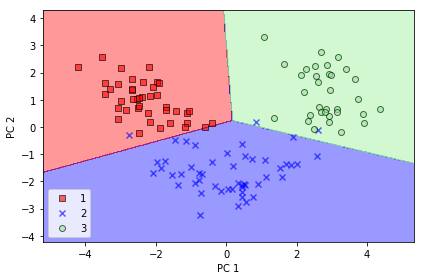

In [15]:
#Training logistic regression classifier using the first 2 principal components

from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression()
lr = lr.fit(X_train_pca,y_train)

plot_decision_regions(X_train_pca,y_train,classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

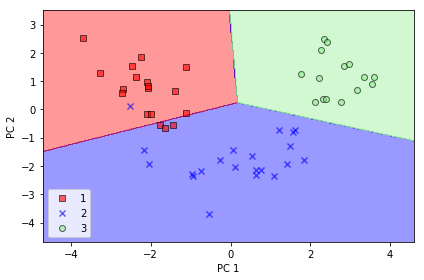

In [16]:
plot_decision_regions(X_test_pca,y_test,classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [17]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

In [18]:
#Supervised data compression via linear discriminant analysis

#Inner workings of linear discriminant analysis

#1. Standardize the d-dimensional dataset (d is the number of features)
#2. For each class, compute the d-dimensional mean vector
#3. Construct the between-class scatter matrix S_B and the within-class scatter matrix S_w
#4. Compute the eigenvectors and corresponding eigenvalues of the matrix S^(-1)_w S_B
#5. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors
#6. Choose the k eigenvectors that correspond to the k largest eigenvalues to construct a d*k - dimensional transformation matrix W; the eigenvectors are the columns of this matrix
#7. Project the samples onto the new feature subspace using the transformation matrix W

#Computing the scatter matrices
#Calculate the mean vectors for each class:

np.set_printoptions(precision=4)
mean_vecs=[]
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label],axis = 0))
    print('MV %s: %s\n' % (label,mean_vecs[label-1]))

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [19]:
#compute the within-class scatter matrix:

d = 13 # number of features
S_W = np.zeros((d,d))

for label, mv in zip(range(1,4),mean_vecs):
    class_scatter = np.zeros((d,d)) #scatter matrix for each class
    for row in X_train_std[y_train==label]:
        row, mv = row.reshape(d,1),mv.reshape(d,1) #make column vectors so that row and mv have the same dimension
        class_scatter += (row-mv).dot((row-mv).T)
    S_W += class_scatter #sum class scatter
print('Within class  scatter matrix: %sx%s' %(S_W.shape[0], S_W.shape[1]))

Within class  scatter matrix: 13x13


In [20]:
#The assumption that we are making when we are computing the scatter matrices is that 
#the class labels in the training set are uniformly distributed
#but as we can see, the assumption is violated

print('Class label distribution: %s' % np.bincount(y_train)[1:])

Class label distribution: [41 50 33]


In [21]:
#Thus, we want to scale the individual scatter matrices S_i before we sum them up as scatter matrix S_W

#divide the scatter matrices by the number of class samples n --> computing the convariance matrix
#--> the convariance matrix is the normalised version of the scatter matrix

d = 13 # number of features
S_W = np.zeros((d,d))

for label in range(1,4): #the original code contain mv which is not used
    class_scatter=np.cov(X_train_std[y_train==label].T)
    S_W+=class_scatter
print('Scatter within-class scatter: %sx%s' %(S_W.shape[0],S_W.shape[1]))

Scatter within-class scatter: 13x13


In [22]:
#Compute the between-class scatter matrix S_B
mean_overall = np.mean(X_train_std,axis=0)
d = 13 # number of features
S_B = np.zeros((d,d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train==i+1,:].shape[0] #number of samples
    mean_vec = mean_vec.reshape(d,1) #make column vector
    mean_overall = mean_overall.reshape(d,1) #make column vector
    S_B += n * (mean_vec-mean_overall).dot((mean_vec-mean_overall).T)
print('Between-class scatter matrix: %sx%s' % (S_B.shape[0],S_B.shape[1]))

Between-class scatter matrix: 13x13


In [23]:
#Selecting linear discriminants for the new feature subspace

#Solve the generalised eigenvalue problem for the matrix S^(-1)_W*S_B:

eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

#maybe np.linalg.eigh will be a better idea, but to be consistent to the book code

In [24]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

349.6178089059939
172.76152218979388
3.7853134512521556e-14
2.117398448224407e-14
1.5164618894178885e-14
1.5164618894178885e-14
1.3579567140455979e-14
1.3579567140455979e-14
7.587760371654683e-15
5.906039984472233e-15
5.906039984472233e-15
2.256441978569674e-15
0.0


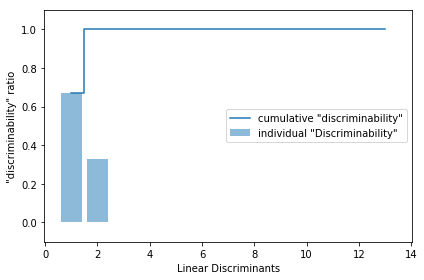

In [25]:
#the number of linear discriminants is at most c-1, c is the number of class labels

#Discriminability: the content of class-discriminatory information

tot = sum(eigen_vals.real)
discr = [(i/tot) for i in sorted(eigen_vals.real,reverse=True)]

cum_discr = np.cumsum(discr)

plt.bar(range(1,14),discr,alpha=0.5,align='center',
        label = 'individual "Discriminability"')
plt.step(range(1,14),cum_discr,where='mid',
        label= 'cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1,1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [26]:
#stack the two most discriminative eigenvector columns to create the transfomation matrix W
w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real,
               eigen_pairs[1][1][:,np.newaxis].real))
print('Matrix W: \n', w)

Matrix W: 
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


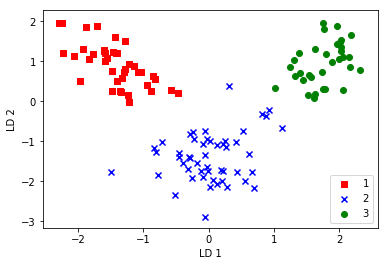

In [27]:
#Projecting samples onto the new feature space

X_train_lda = X_train_std.dot(w)
colors = ['r','b','g']
markers = ['s','x','o']

for l, c, m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1] * (-1), #actually (1 or -1) has no difference in differentiating the dots
                c = c, label = l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc = 'lower right')
plt.show()

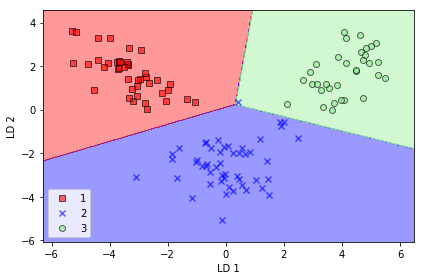

In [28]:
#LDA via scikit-learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 2)
X_train_lda = lda.fit_transform(X_train_std,y_train)

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr = lr.fit(X_train_lda,y_train)
plot_decision_regions(X_train_lda,y_train,classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

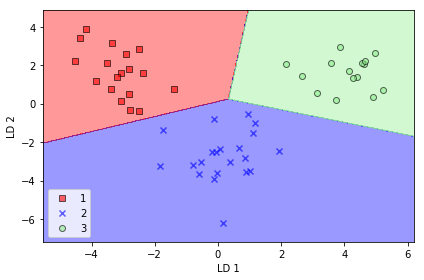

In [29]:
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda,y_test,classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [30]:
#Using kernel principal component analysis for nonlinear mappings

#Tackling Non-linear problem: projecting nonlinear problem onto a new feature space of higher dimensionality where the classes become linearly separable
#Kernel PCA: use standard PCA in this higher-dimensional space to project the data back onto a lower-dimensional space where the samples can be separated by a linear classifier
#Kernel trick: a way to increase computation efficiency when projecting to higher dimension by avoiding calculating the pairwise dot products of the samples by ising a kernel function
#Kernel function: a function that calculates a dot product between two vectors - a measure of similarity

#Radial Basis Function (RBF) or Gaussian kernel:
#1. Compute the kernel (similarity) matrix K
#2. Center the kernel matrix (Standardize the data)
#4. Collect the top k eigenvectors of the centered kernel matrix based on their corresponding eigenvalues
#In contrast to standard PCA, the eigenvectors are not the principal component axes but the samples already projected onto these axes

#Implementing a kernel principal component analysis in Python


from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    
    """
    RBF kernel PCA implementation
    
    Parameters
    -----------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
    
    gamma, float
        Tuning parameter of the RBF kernel
    
    n_components: int
        Number of principal components to return
    
    Returns
    ---------------
    X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
        Projected dataset
    """
    
    #Calculate pairwise squared Euclidean distances
    #in the MxN dimensional dataset
    sq_dists = pdist(X, 'sqeuclidean')
    
    #Convert pairwise distances into a square matrix
    mat_sq_dists = squareform(sq_dists)
    
    #Compute the symmetric kernel matrix
    K = exp(-gamma * mat_sq_dists)
    
    #Center the kernel matrix
    N = K.shape[0]
    one_n = np.ones((N,N))/N
    K =  K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    #Obtaining eigenpairs from the centered kernel matrix
    #scipy.linalg.eigh returns them in ascending order
    
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:,::-1]
        
    #Collect the top k eigenvectors (projected samples)
    X_pc = np.column_stack((eigvecs[:,i] for i in range(n_components)))
    
    return X_pc


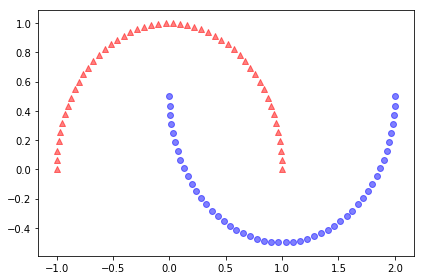

In [31]:
#Example 1: Separating half-moon shapes

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, random_state=123)

plt.scatter(X[y==0,0],X[y==0,1],color='red',marker='^',alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],color='blue',marker='o',alpha=0.5)

plt.tight_layout()
plt.show()

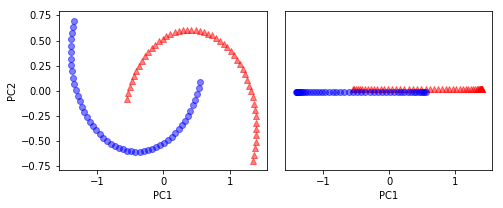

In [32]:
#unfold the half-moon shapes are not linearly separable, and our goal is to unfold the half-moons via kernel PCA
#so that the dataset can serve as a suitable input for a linear classifier.

from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))


ax[0].scatter(X_spca[y==0,0],X_spca[y==0,1],
              color='red', marker='^', alpha=0.5)

ax[0].scatter(X_spca[y==1,0],X_spca[y==1,1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y==0,0],np.zeros((50,1))+0.02,
              color='red', marker='^', alpha=0.5)

ax[1].scatter(X_spca[y==1,0],np.zeros((50,1))-0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.show()

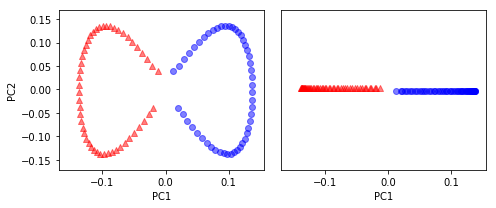

In [33]:
X_kpca = rbf_kernel_pca(X,gamma=15,n_components=2)

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))

ax[0].scatter(X_kpca[y==0,0],X_kpca[y==0,1],
              color='red', marker='^', alpha=0.5)

ax[0].scatter(X_kpca[y==1,0],X_kpca[y==1,1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y==0,0],np.zeros((50,1))+0.02,
              color='red', marker='^', alpha=0.5)

ax[1].scatter(X_kpca[y==1,0],np.zeros((50,1))-0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()

plt.show()

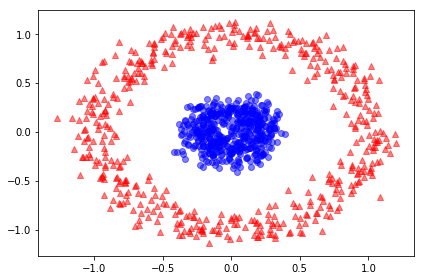

In [34]:
#Example 2: Separating concentric circles

from sklearn.datasets import make_circles

X,y = make_circles(n_samples = 1000, random_state=123,noise=0.1,factor=0.2)

plt.scatter(X[y==0,0],X[y==0,1],color='red',marker='^',alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],color='blue',marker='o',alpha=0.5)

plt.tight_layout()
plt.show()

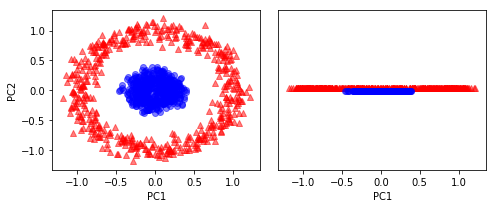

In [37]:
#pca

scikit_pca=PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))

ax[0].scatter(X_spca[y==0,0],X_spca[y==0,1],color='red',marker='^',alpha=0.5)
ax[0].scatter(X_spca[y==1,0],X_spca[y==1,1],color='blue',marker='o',alpha=0.5)
ax[1].scatter(X_spca[y==0,0],np.zeros((500,1))+0.02,color ='red',marker='^',alpha=0.5)
ax[1].scatter(X_spca[y==1,0],np.zeros((500,1))-0.02,color='blue',marker='o',alpha=0.5)


ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('images/05_16.png', dpi=300)
plt.show()

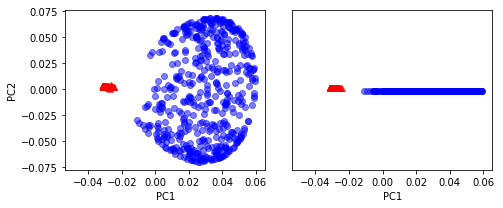

In [38]:
#kpca

X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y == 0, 0], np.zeros((500, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((500, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('images/05_17.png', dpi=300)
plt.show()

In [39]:
#Projecting new data points

#Unlike standard PCA, Kernel PCA is a memory-based method
#we have to re-use the original training set each time to project new samples

#we have to calculate the pairwise RBF kernel (similarity) between each ith sample in the training dataset and the new sample x`

#after calculating the similarity between the new samples and the samples in the training set
#we have to normalise the eigenvector a by its eigenvalue

#Modify the rbf_kernel_pca that so that it also returns the eigenvalues of the kernel matrix

from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X,gamma,n_components):
    """
    RBF kernel PCA implementation.
    
    Parameters
    -------------------
    X:{NumPy ndarray}, shape = [n_samples, n_features]
    
    gamma: float
        Tuning parameter of the RBF kernel
        
    n_components: int
        Number of principal components to return
    
    Returns
    --------------------
    X_pc:{NumPy ndarray}, shape = [n_samples, k_features]
    
    lambdas: list
        Eigenvalues
    """
    
    #Calculate pairwise squared Euclidean distances
    #in the MxN dimensional dataset
    sq_dists = pdist(X,'sqeuclidean')
    
    #Convert pairwise distances into a square matrix
    mat_sq_dists = squareform(sq_dists)
    
    #Compute the symmetric kernel matrix
    K = exp(-gamma*mat_sq_dists)
    
    #Center the kernel matrix
    N = K.shape[0]
    one_n = np.ones((N,N))/N
    K = K-one_n.dot(K) - K.dot(one_n)+one_n.dot(K).dot(one_n)
    
    #Obtaining eigenpairs from the centered kernel matrix
    #scipy.linalg.eigh returns them in ascending order
    
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:,::-1]
    
    #Collect the top k eigenvectors (projected samples)
    alphas = np.column_stack((eigvecs[:,i] for i in range(n_components)))
    
    #Collect the corresponding eigenvalues
    lambdas = [eigvals[i] for i in range(n_components)]
    
    return alphas, lambdas
    

In [54]:
X, y = make_moons(n_samples = 100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X,gamma=15, n_components=1)

In [55]:
x_proj = alphas[25] # original projection
x_proj

array([0.0788])

In [42]:
#assume that the 26th pt from the half-moon dataset is a new data point x'
#we will project it onto this new subspace

x_new = X[25]
x_new

array([1.8713, 0.0093])

In [47]:
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new-row)**2) for row in X])
    k = np.exp(-gamma*pair_dist)
    return k.dot(alphas/lambdas) #alphas: eigenvec, lambdas: eigenvalues

#projection of the "new" datapoint
x_reproj = project_x(x_new,X,gamma=15,alphas=alphas,lambdas=lambdas)

x_reproj

array([0.0788])

In [49]:
X

array([[ 8.7132e-01,  4.9072e-01],
       [ 7.1547e-01, -4.5867e-01],
       [ 1.4625e+00, -3.8660e-01],
       [-2.2252e-01,  9.7493e-01],
       [ 3.2770e-01, -2.4028e-01],
       [ 1.0000e+00,  0.0000e+00],
       [ 9.4906e-01,  3.1511e-01],
       [ 0.0000e+00,  5.0000e-01],
       [ 1.4048e+00, -4.1441e-01],
       [ 9.6729e-01,  2.5365e-01],
       [ 9.6023e-02,  9.9538e-01],
       [ 4.2788e-01, -3.2017e-01],
       [ 1.0960e+00, -4.9538e-01],
       [ 1.9859e-01, -9.8111e-02],
       [ 3.2052e-02,  9.9949e-01],
       [-9.0097e-01,  4.3388e-01],
       [ 1.1596e+00, -4.8718e-01],
       [-7.6145e-01,  6.4823e-01],
       [ 7.3083e-02,  1.2473e-01],
       [ 1.0321e+00, -4.9949e-01],
       [-6.2349e-01,  7.8183e-01],
       [ 1.7614e+00, -1.4823e-01],
       [ 3.4537e-01,  9.3847e-01],
       [-2.8453e-01,  9.5867e-01],
       [-4.0478e-01,  9.1441e-01],
       [ 1.8713e+00,  9.2824e-03],
       [ 1.6235e+00, -2.8183e-01],
       [ 8.3809e-01,  5.4553e-01],
       [ 1.8441e-02,

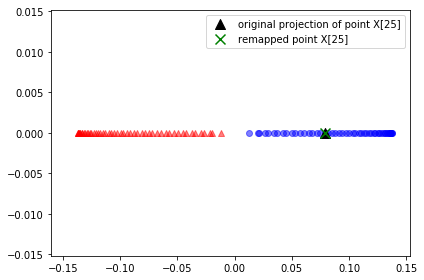

In [57]:
plt.scatter(alphas[y == 0, 0], np.zeros((50)),
            color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y == 1, 0], np.zeros((50)),
            color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black',
            label='original projection of point X[25]', marker='^', s=100)
plt.scatter(x_reproj, 0, color='green',
            label='remapped point X[25]', marker='x', s=100)
plt.legend(scatterpoints=1)

plt.tight_layout()
# plt.savefig('images/05_18.png', dpi=300)
plt.show()

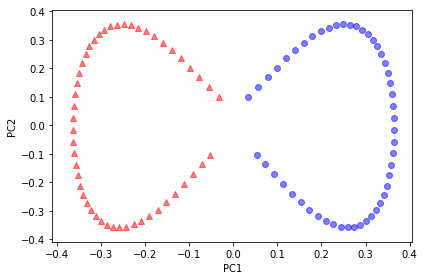

In [60]:
#Kernel principal component analysis in scikit-learn

from sklearn.decomposition import KernelPCA

X,y = make_moons(n_samples=100, random_state=123)
scikit_kpca= KernelPCA(n_components=2,kernel='rbf',gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.scatter(X_skernpca[y == 0, 0], X_skernpca[y==0,1],color='red',marker='^',alpha=0.5)
plt.scatter(X_skernpca[y == 1, 0], X_skernpca[y==1,1],color='blue',marker='o',alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()